In [62]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("spam.csv", encoding='latin-1')

In [6]:
import sys
print(sys.executable)

c:\Users\HP\anaconda3\python.exe


In [7]:
data.shape

(5572, 5)

#### Process Involved
1. Data Preprocessing
2. data cleaning
3. EDA
4. Text processing
5. Model building 
6. Evalution 
7. Hypertunning
8. Web convertion
9. Deploy

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.rename({"v1":"Target","v2":"Text"}, axis=1, inplace=True)

In [11]:
# Encoding the categorical values
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

data['Target'] = encode.fit_transform(data['Target'])
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
print(data.isnull().sum())
print("Duplicate Value: " + str(data.duplicated().sum()))

Target    0
Text      0
dtype: int64
Duplicate Value: 403


In [13]:
#  Remove the duplicate value
data.drop_duplicates(inplace=True)

### EDA


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


([<matplotlib.patches.Wedge at 0x2223cc17560>,
 [Text(-1.0144997251399075, 0.4251944351600247, '0'),
  Text(1.014499764949479, -0.4251943401757036, '1')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

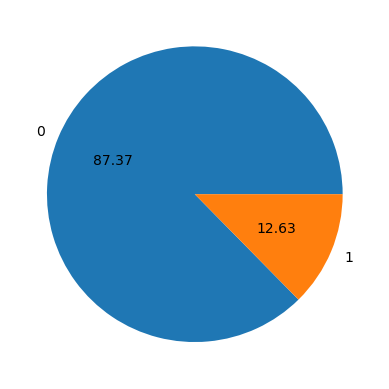

In [15]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(),autopct="%0.2f",labels=data["Target"].unique())

`Observation: little imbalance in our data`

### Text preprocessing

In [16]:
import nltk
nltk.download("punkit")  

[nltk_data] Error loading punkit: Package 'punkit' not found in index


False

In [17]:
data['total character'] = data.Text.apply(len)
data

,Target,Text,total character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
# Total no.of words
data['total words'] = data.Text.apply(lambda x:len(nltk.word_tokenize(x)))
data

,Target,Text,total character,total words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [19]:
# No of sentence
data["total sentence"] = data.Text.apply(lambda x:len(nltk.sent_tokenize(x)))
data

,Target,Text,total character,total words,total sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
data[data["Target"]==0].describe()

,Target,total character,total words,total sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [21]:
data[data["Target"]==1].describe()

,Target,total character,total words,total sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='total character', ylabel='Count'>

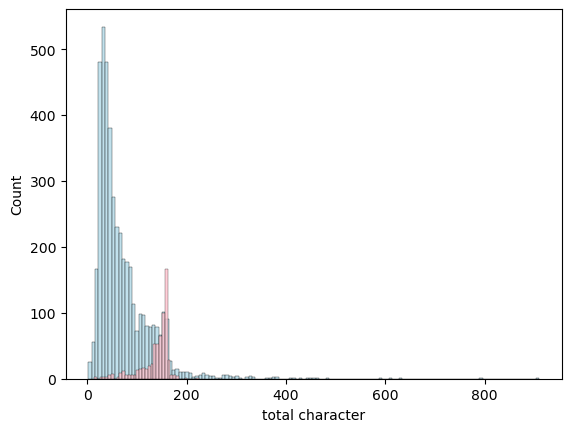

In [22]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total character']
filtered_data2 = data.loc[data['Target'] == 0, 'total character']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total words', ylabel='Count'>

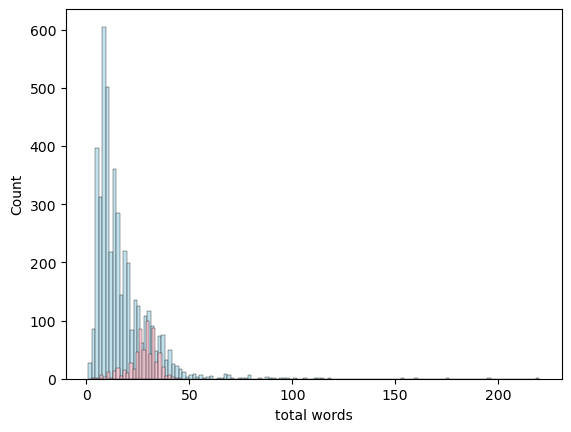

In [23]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total words']
filtered_data2 = data.loc[data['Target'] == 0, 'total words']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total sentence', ylabel='Count'>

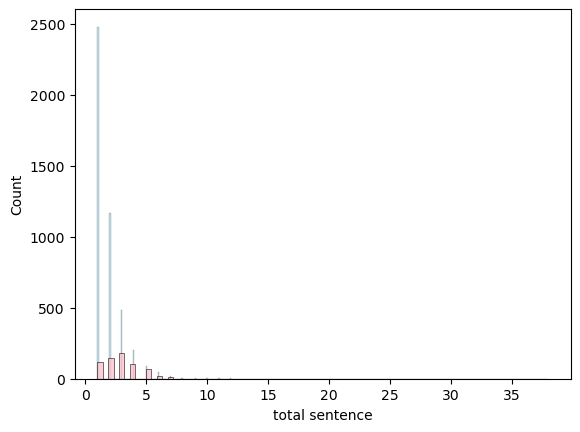

In [24]:
# Total no. of sent
filtered_data1= data.loc[data['Target'] == 1, 'total sentence']
filtered_data2 = data.loc[data['Target'] == 0, 'total sentence']

import seaborn as sns 
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")


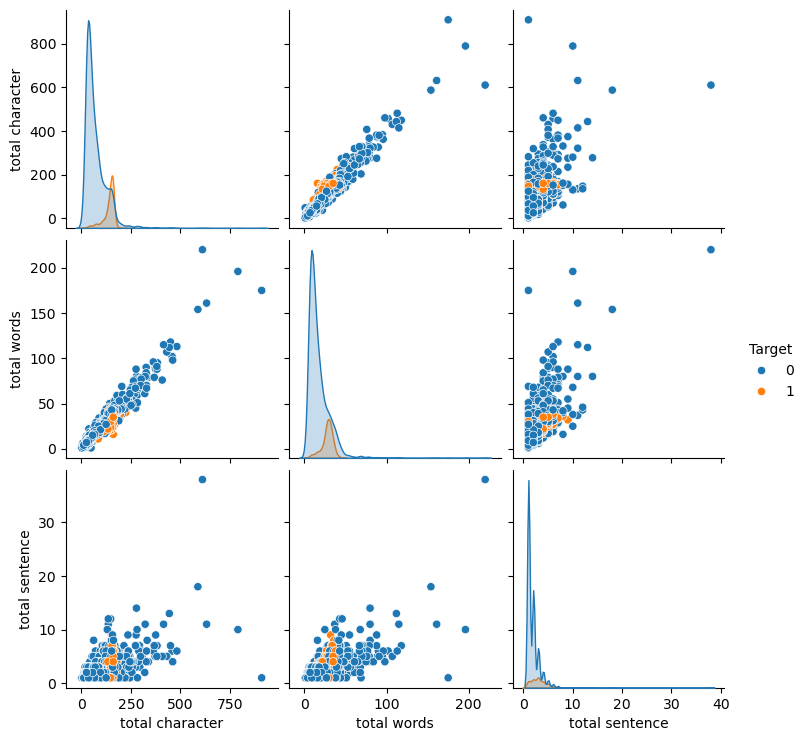

In [25]:
sns.pairplot(data,hue="Target")

There is linearity in my data 

<Axes: >

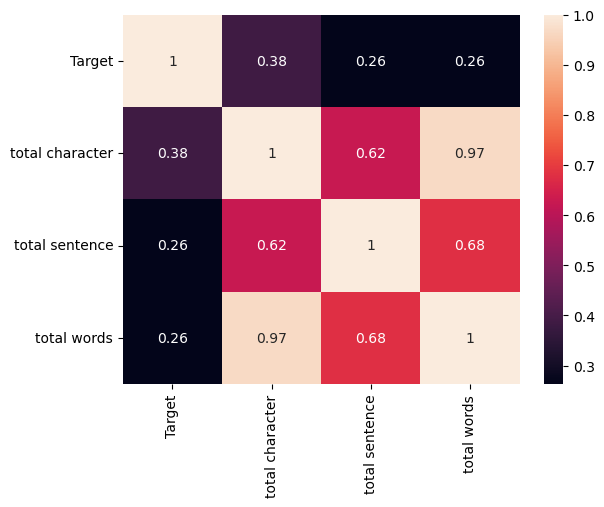

In [26]:
matrix =data[["Target", "total character" , "total sentence", "total words"]].corr()
sns.heatmap(matrix,annot=True)

`obsertion`: As I can see there is Multi-colinearity in data so, i will keep only one feature values --> that one would be `total charater` becouse it has high corelation with target values

### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

import string 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem("loving") 

In [29]:
def process_text(text):

    text = text.lower()
    y = nltk.word_tokenize(text)

    text = y[:]
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    

    text = y[:]
    y = []
    for i in text:
         i=ps.stem(i)
         y.append(i)

    
    return ' '.join(y)

In [30]:
data["transformed_text"] = data.Text.apply(process_text)

In [31]:
data

,Target,Text,total character,total words,total sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


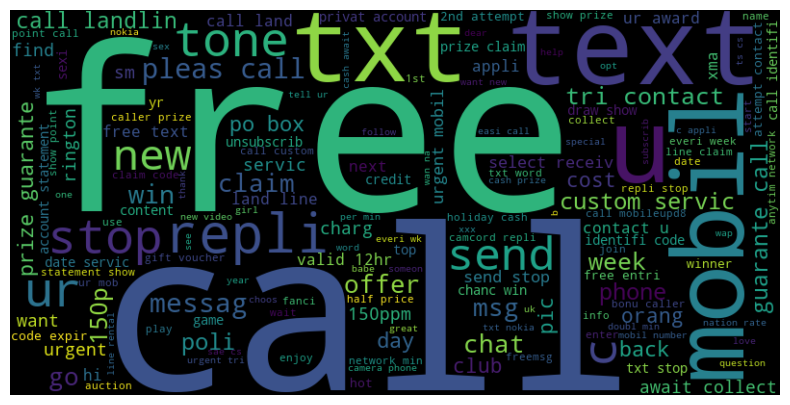

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the WordCloud dimensions are reasonable
wc = WordCloud(width=800, height=400, min_font_size=10, background_color="black")

# Filter and concatenate texts
filtered_texts = data.loc[data["Target"] == 1, "transformed_text"]
concatenated_text = ' '.join([text if isinstance(text, str) else ' '.join(text) for text in filtered_texts])

# Generate the word cloud
spam_wc = wc.generate(concatenated_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


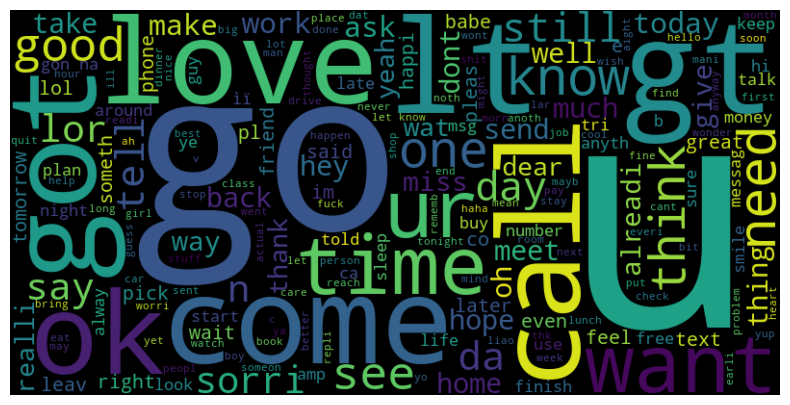

In [33]:
data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure the WordCloud dimensions are reasonable
wc = WordCloud(width=800, height=400, min_font_size=10, background_color="black")

# Filter and concatenate texts
filtered_texts = data.loc[data["Target"] == 0, "transformed_text"]
concatenated_text = ' '.join([text if isinstance(text, str) else ' '.join(text) for text in filtered_texts])

# Generate the word cloud
spam_wc = wc.generate(concatenated_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
data

,Target,Text,total character,total words,total sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [35]:
spam_corpus=[]
for vec in (data[data["Target"] ==1]["transformed_text"]).tolist():
    for word in vec.split(sep=" "):
        spam_corpus.append(word)

spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [36]:
from collections import Counter   # ---> returns a dict with no. of frequency
cnt = Counter(spam_corpus).most_common(30)

### Naive Bayes

### Vectorisation Techqniques
- 1. Bag of words 
- 2. tfidf
- 3. vec2vec
- 4. Glove 
- 5. Many others

In [37]:
# CountVectocizer ---> Used for Bag of words techq of encoding --> in this we create a column of most occuring words for each sectencce those set of no. are considered to be vector.

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vector = (vec.fit_transform(data["transformed_text"])).toarray()

# ---> would convert it to dense array -- as it return sparse array

In [38]:
X = vector
y = data["Target"]

# Trian test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# there are types of Naive Beys algorithm ---> the type depends on the type of distribution of data
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

GNB = GaussianNB()
BNB = BernoulliNB()
MNB = MultinomialNB()


MNB.fit(X_train,y_train)

MultinomialNB()

In [39]:

GNB.fit(X_train,y_train)
# predict
pred1 = GNB.predict(X_test)

# Evaluate
# --> Naive bayes is a high pression based model ---> more the true positve more mean less false negative and more precession
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.877498388136686
[[1171  160]
 [  30  190]]
0.5428571428571428


In [40]:

BNB.fit(X_train,y_train)
pred2 = BNB.predict(X_test)

print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.9658284977433914
[[1326    5]
 [  48  172]]
0.9717514124293786


In [41]:
pred3 = MNB.predict(X_test)

print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))


0.9761444229529336
[[1310   21]
 [  16  204]]
0.9066666666666666


### Let's try training our model with encoding techq `tfidf method`

In [42]:
data.head()

,Target,Text,total character,total words,total sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tf = TfidfVectorizer()
tf = TfidfVectorizer(max_features=(int(len(spam_corpus)/2)))
# Why don't we try to limit max parameter(words)

vector1 = (tf.fit_transform(data['transformed_text'])).toarray()
X1 = vector1
y1 = data['Target']

# train test split 
X_train , X_test, y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=42)

In [44]:
# Gaussian Naive bayes
GNB.fit(X_train,y_train)

pred1 = GNB.predict(X_test)

print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8749194068343005
[[1171  160]
 [  34  186]]
0.5375722543352601


In [45]:

BNB.fit(X_train,y_train)
pred2 = BNB.predict(X_test)

print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.970341715022566
[[1328    3]
 [  43  177]]
0.9833333333333333


In [46]:
MNB.fit(X_train,y_train)
pred3 = MNB.predict(X_test)

print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.9613152804642167
[[1331    0]
 [  60  160]]
1.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [48]:
lg = LogisticRegression(solver='saga', penalty='l1')
svc = SVC(kernel='sigmoid',gamma=1.0)
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rdt = RandomForestClassifier(n_estimators=50,random_state=42)
bagg = BaggingClassifier(n_estimators=50,random_state=42)
boost = AdaBoostClassifier(n_estimators=50,random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=42)
ex = ExtraTreesClassifier(n_estimators=50,random_state=42)
xg = XGBClassifier(n_estimators=50,random_state=42)

In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knn, 
    'DT': dt, 
    'LR': lg, 
    'RF': rdt, 
    'AdaBoost': boost, 
    'BgC': bagg, 
    'ETC': ex,
    'GBDT':gbdt,
    'xgb':xg
}

In [50]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [51]:
acc = []
pre = []

for name,clf in clfs.items():

    accuray , precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For", name , 'accuracy is',accuray,'precession is',precision)

    acc.append(accuray)
    pre.append(precision)


For SVC accuracy is 0.9742101869761445 precession is 0.96875
For KN accuracy is 0.8897485493230174 precession is 1.0
For DT accuracy is 0.9335912314635719 precession is 0.8874172185430463


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


For LR accuracy is 0.941972920696325 precession is 0.8869047619047619
For RF accuracy is 0.9658284977433914 precession is 0.9883040935672515


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost accuracy is 0.9626047711154094 precession is 0.921875
For BgC accuracy is 0.9613152804642167 precession is 0.8883495145631068
For ETC accuracy is 0.9748549323017408 precession is 0.9891891891891892
For GBDT accuracy is 0.9516441005802708 precession is 0.9239766081871345
For xgb accuracy is 0.9690522243713733 precession is 0.93


In [52]:
score = pd.DataFrame({"Classifier":clfs.keys(),
                      "accuracy_score":acc,
                      "precision_score":pre}).sort_values(by='precision_score',ascending=False)
score

,Classifier,accuracy_score,precision_score
1,KN,0.889749,1.000000
7,ETC,0.974855,0.989189
4,RF,0.965828,0.988304
0,SVC,0.974210,0.968750
9,xgb,0.969052,0.930000
8,GBDT,0.951644,0.923977
5,AdaBoost,0.962605,0.921875
6,BgC,0.961315,0.888350
2,DT,0.933591,0.887417
3,LR,0.941973,0.886905


- `we could have performed scaling, but i performed it earlier and it was not affecting our results much`
- `we could have also included other feature total words, character, but it was not affecting much`

In [53]:
# Votting Classifier --> In this we combine with models like random forest, svc and knn
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
ETC = ExtraTreesClassifier(n_estimators=50, random_state=42)

In [54]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([("svm",svc),('mnb',MNB),('ETC',ETC)],voting='soft')

voting.fit(X_train,y_train)

pred = voting.predict(X_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))

0.9825918762088974
0.9948717948717949


In [60]:
# Applying Stacking
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=[('svm',svc),('mnb',MNB),('ETC',ETC)] , final_estimator=RandomForestClassifier())

stack.fit(X_train,y_train)
pred = stack.predict(X_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))


0.9793681495809156
0.9476190476190476


Obsertion: Till now i am getting better result from --> voting 

In [66]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(voting,X_train,y_train,cv=10,n_jobs=-1,error_score='raise')))

0.9781668477678638


- `A little overfitting , but overall good model`

In [70]:
import pickle
pickle.dump(tf,open('tf.pkl','wb'))
pickle.dump(voting,open('voting.pkl','wb'))